### 이미지 분류 모델 만들기

## 1. 데이터전처리 <hr>
- v2 및 Image폴더를 활용한 데이터 전처리 및 데이터셋 생성

## 1. 이미지 증폭 (돌리기)<hr>

In [1]:
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import v2

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
def make_ids(DF, name_list):
    '''이미지 링크 추출하는 함수'''
    link_list=[]
    for name in name_list:
        ids= DF[DF['subCategory']==name]['id']
        for id in ids:
            link_list.append(id)
    return link_list

In [3]:
fashionDF=pd.read_csv('./fashionDF.csv')
ids=make_ids(fashionDF, ['Bottomwear'])

In [2]:
# 수직으로 돌려서 저장
for id in ids:
    input_img_path='./test.jpg'
    output_img_path='./test_changed.jpg'
    transConvert = v2.Compose([
        transforms.ToTensor(),
        transforms.RandomVerticalFlip(p=1)
    ])
    # 이미지 열기
    img=Image.open(input_img_path)
    # 돌리기
    changed_img=transConvert(img)
    # 다시 이미지로
    changed_img= transforms.ToPILImage()(changed_img)
    # 저장
    changed_img.save(output_img_path)


In [ ]:
# 수평으로 돌려서 저장

input_img_path='./test.jpg'
output_img_path='./test_changed.jpg'
transConvert = v2.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=1)
])
# 이미지 열기
img=Image.open(input_img_path)
# 돌리기
changed_img=transConvert(img)
# 다시 이미지로
changed_img= transforms.ToPILImage()(changed_img)
# 저장
changed_img.save(output_img_path)

In [3]:
# 왼쪽으로 돌려서 저장

transConvert = v2.Compose([
    transforms.RandomApply([ transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAdjustSharpness(0)], p=0.8),
    transforms.ToTensor(),
    v2.Resize(size=(342), interpolation=v2.InterpolationMode.BILINEAR),
    v2.CenterCrop(299),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # v2.ToDtype(torch.float32, scale=True)
    # v2.ToImage()
    # transforms.RandomErasing(p=1, scale=(0.02, 0.3),
    #                          ratio=(0.1,2.5)),
])

In [4]:
# 데이터 전처리

transConvert = v2.Compose([
    v2.Resize(size=(384), interpolation=v2.InterpolationMode.BILINEAR),
    v2.CenterCrop(384),
    transforms.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
# 이미지 폴더 생성
DATA_DIR='./img'
imgDS=ImageFolder(root=DATA_DIR, transform=transConvert target=)

In [44]:
print(f'imgDS.classes       : {imgDS.classes}')
print(f'imgDS.class_to_idx  : {imgDS.class_to_idx}')
print(f'imgDS.targets       : {imgDS.targets}')
for img in imgDS.imgs:
    print(f'imgDS.imgs       : {img}')
    break
len(imgDS)

imgDS.classes       : ['bottomwear', 'others']
imgDS.class_to_idx  : {'bottomwear': 0, 'others': 1}
imgDS.targets       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

44441

In [53]:
a=fashionDF[fashionDF['subCategory']=='Bottomwear']['id']
print(a.count())
b= fashionDF[fashionDF['subCategory']!='Bottomwear']['id']
b.count()
plt.pie(x=[a.count(),b.count()], labels=['bottom', 'notbottom'],
        autopct='%.1f')

2694


41752

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


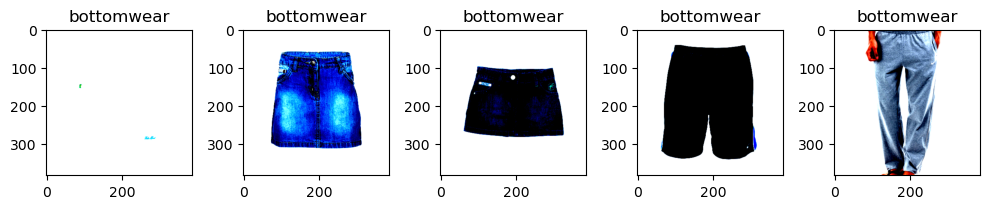

In [7]:
LABEL_NAMES = imgDS.classes

# 3개 데이터와 타겟 로딩
fig, axes=plt.subplots(1,5, figsize=(10, 4))
for idx, (img_data, target) in enumerate(imgDS) :
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(LABEL_NAMES[target])
    if idx >=4: break
plt.tight_layout()
plt.show()

#### 2. 모델 설계 <hr>

In [11]:
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
from sklearn.model_selection import train_test_split 
from torch.utils.data import DataLoader, Dataset, random_split

In [19]:
model= efficientnet_v2_s(weights=EfficientNet_V2_S_Weights)
model.parameters

<bound method Module.parameters of EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine

In [20]:
import torch.nn.functional as F

In [21]:
# FC (head)층 수정
h_layers=nn.ModuleList()
hidden=[1500, 1000, 800, 500]
for h in range(len(hidden)-1):
            h_layers.append(nn.Linear(hidden[h], hidden[h+1]))

model.classifier=nn.Sequential(
    nn.Linear(in_features=1280, out_features=1),
    nn.Sigmoid()
)

In [22]:
# 사전학습 모델 파라미터 비활성화 
for named, param in model.named_parameters():
    print(f'[{named}] - {param.shape}')
    # 역전파 시에 업데이트 되지 않도록 설정
    param.requires_grad=False
# 전결합층 모델 파라미터 활성화
for param in model.classifier.parameters():
    param.requires_grad=True

[features.0.0.weight] - torch.Size([24, 3, 3, 3])
[features.0.1.weight] - torch.Size([24])
[features.0.1.bias] - torch.Size([24])
[features.1.0.block.0.0.weight] - torch.Size([24, 24, 3, 3])
[features.1.0.block.0.1.weight] - torch.Size([24])
[features.1.0.block.0.1.bias] - torch.Size([24])
[features.1.1.block.0.0.weight] - torch.Size([24, 24, 3, 3])
[features.1.1.block.0.1.weight] - torch.Size([24])
[features.1.1.block.0.1.bias] - torch.Size([24])
[features.2.0.block.0.0.weight] - torch.Size([96, 24, 3, 3])
[features.2.0.block.0.1.weight] - torch.Size([96])
[features.2.0.block.0.1.bias] - torch.Size([96])
[features.2.0.block.1.0.weight] - torch.Size([48, 96, 1, 1])
[features.2.0.block.1.1.weight] - torch.Size([48])
[features.2.0.block.1.1.bias] - torch.Size([48])
[features.2.1.block.0.0.weight] - torch.Size([192, 48, 3, 3])
[features.2.1.block.0.1.weight] - torch.Size([192])
[features.2.1.block.0.1.bias] - torch.Size([192])
[features.2.1.block.1.0.weight] - torch.Size([48, 192, 1, 1])


In [83]:
# 데이터 분리-> test O
train_size = int(0.8 * len(imgDS))  # 80%
val_size = int(len(imgDS))- train_size

print(train_size, val_size)
train_dataset, val_dataset = random_split(imgDS, [train_size, val_size])


# 데이터 로더 생성
trainDL=DataLoader(train_dataset, batch_size=1)
testDL=DataLoader(val_dataset, batch_size=1, shuffle=True)


35552 8889


In [84]:
# 데이터 로더 테스트
for f, t in testDL:
    print(f.shape, t.shape)
    break

torch.Size([1, 3, 384, 384]) torch.Size([1])


In [85]:

import torch.nn.functional as F
import torch.optim as optim
import os

In [86]:
EPOCH=100
LR=0.001
optimizer= optim.Adam(model.parameters(), lr=LR)
DEVICE='cuda' if torch.cuda.is_available() else 'cpu'
SAVE_PATH='./model'
SAVE_FILE='wbs_all.pth'

# 폴더 존재 여부 확인 및 생성
if not os.path.exists('./model'):
    os.mkdir('./model')

In [87]:


for f, t in trainDL:
    pre_y=model(f)[0]
    Lossfunc= nn.BCELoss()
    Scorefunc=F1Score(task='binary', num_classes=2)

    print(pre_y, t)
    loss=Lossfunc(pre_y, t.float())
    score=Scorefunc(pre_y, t)
    print(loss, score)
    break

tensor([0.9997], grad_fn=<SelectBackward0>) tensor([1])
tensor(0.0003, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1.)


In [88]:
from torchmetrics.classification import F1Score, MulticlassF1Score
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics.regression import R2Score, MeanSquaredError
import torch
import matplotlib.pyplot as plt
from typing import Literal
import pandas as pd
import torch.optim.lr_scheduler as lr_scheduler

In [34]:
def model_training(model, trainDL, testDL, optimizer, device, epoch: int, LIMIT: int, break_param: Literal['score', 'loss'],
                   type: Literal['reg', 'binary', 'muticlass'],optim_type: Literal['score', 'loss'], SAVE_PATH, SAVE_FILE,
                   save_type: Literal['all', 'param', 'None'], numcls: int):
    '''
    학습진행+ 모니터링+ 최적의 결과 저장\n
    type= 'reg'|'binary'|'mclf'  \n
    return: LOSS_HISTORY, SCORE_HISTORY
    '''
    #스케쥴러 옵션 설정
    if optim_type== 'score':
        scheduler= lr_scheduler.ReduceLROnPlateau(optimizer, patience=LIMIT, mode='max')
    else: scheduler= lr_scheduler.ReduceLROnPlateau(optimizer, patience=LIMIT, mode='min')
    EPOCH=epoch
    # 손실, 평가값 저장
    LOSS_HISTORY, SCORE_HISTORY= [[],[]], [[],[]]
    for ep in range(EPOCH):
        print(f'{ep+1}/{EPOCH}')
        model.train()
        loss_total, score_total= 0,0
        loss_val_total, score_val_total=0,0

        for train_feature, train_target in trainDL:
            # 학습
            train_feature.to(device); train_target.to(device)
            pre_y=model(train_feature)
            pre_y=torch.round(F.sigmoid(pre_y))
            # 손실
            if type=='reg':
                Lossfunc=MeanSquaredError().to(device)
                Scorefunc=R2Score().to(device)
            elif type=='binary':
                Lossfunc= nn.BCELoss().to(device)
                Scorefunc=F1Score(task='binary', num_classes=numcls).to(device)
            elif type=='muticlass':
                Lossfunc=nn.CrossEntropyLoss().to(device)
                Scorefunc=F1Score(task='multiclass', num_classes=numcls).to(device)

            loss= Lossfunc(pre_y, train_target.reshape(-1,1).float())
            loss_total+=loss.item()

            # 평가
            score= Scorefunc(pre_y, train_target.reshape(-1,1).float())
            score_total+=score.item()
            # 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # 검증

        model.eval()
        with torch.no_grad():
            for val_feature, val_target in testDL:
                val_feature.to(device)
                val_target.to(device)
                # 학습
                pre_val= model(val_feature)
                pre_val=F.sigmoid(pre_val)[0]
                # 손실
                loss= Lossfunc(pre_val, val_target.reshape(-1).long() if type=='muticlass' else val_target.reshape(-1) if type=='reg' else val_target.reshape(-1))
                loss_val_total+=loss.item()

                # 평가
                score= Scorefunc(pre_val, val_target.reshape(-1) if type=='muticlass' else val_target)
                score_val_total+=score.item()

        
        # 저장
        LOSS_HISTORY[0].append(loss_total/len(trainDL))
        SCORE_HISTORY[0].append(score_total/len(trainDL))
        print(f'Train\n Loss: {loss_total/len(trainDL)}\n Score: {score_total/len(trainDL)}')

        LOSS_HISTORY[1].append(loss_val_total/len(testDL))
        SCORE_HISTORY[1].append(score_val_total/len(testDL))
        print(f'Val\n Loss: {loss_val_total/len(testDL)}\n Score: {score_val_total/len(testDL)}')

        # 성능이 좋은 학습 가중치 저장
        if save_type:
            if save_type=='all':
                save_type= model
            elif save_type=='param':
                save_type=model.state_dict()
            if len(SCORE_HISTORY[1]) == 1: 
            #첫번째는 무조건 저장
                torch.save(save_type, SAVE_PATH+SAVE_FILE)  
                
            else:
                if SCORE_HISTORY[1][-1]> max(SCORE_HISTORY[1][:-1]): # 자신을 제외한 최대점수값과 비교
                    torch.save(save_type, SAVE_PATH+str(ep)+SAVE_FILE) 
                     
        else: pass

        
        # 학습 진행 모니터링 (검증 데이터 개선이 되지 않았을때 누적 ->  평가, 손실 중 지표 하나 선택)
        # 최적화 스케쥴러 인스턴스 업데이트
        scheduler.step(score_val_total/len(testDL))
        # 손실 감소 (또는 성능 개선)이 안되는 경우 조기종료
        if scheduler.num_bad_epochs== scheduler.patience:
            print(f'{scheduler.patience} EPOCH 성능 개선이 없어서 조기종료함')
            break

    return LOSS_HISTORY, SCORE_HISTORY, ep

In [35]:
# 학습
LOSS_HISTORY, SCORE_HISTORY, ep= model_training(model=model, trainDL=trainDL, testDL=testDL, device=DEVICE,
               optimizer=optimizer,LIMIT=15, break_param='score',
               type='binary', optim_type='score', SAVE_PATH=SAVE_PATH,
               SAVE_FILE='fashion_all.pth', save_type='all',
               numcls=2, epoch=EPOCH)

1/100


KeyboardInterrupt: 

In [164]:
testDL=DataLoader(val_dataset, batch_size=2, shuffle=True)
for f, t in testDL:
    print(f.shape, t.shape)
    pre_y=F.sigmoid(model(f))
    for y in pre_y:
        if y>0.5: result=1
        else: y=1-y; result=0
        print(y, result)
    break

torch.Size([2, 3, 384, 384]) torch.Size([2])
tensor([0.7311], grad_fn=<UnbindBackward0>) 1
tensor([0.7311], grad_fn=<UnbindBackward0>) 1


In [ ]:
from sklearn.metrics import classification_report
# 시도 1 약 90점
model=torch.load(r'C:\Users\KDP-25\Desktop\test\FLASK_AI\project\model\modelfashion_all.pth',
                 weights_only=False,
                 map_location=torch.device('cpu'))
testDL=DataLoader(val_dataset,batch_size=1000)
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
    break